In [1]:
import numpy as np
import  sympy as sp
from sympy import Matrix
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing(use_unicode=True)#printing option pf sympy

### Sanity check
I am going to find gauge potential of Landau-Zener model: $H = \Delta \sigma_z + \lambda \sigma_x$.

In [2]:
Delta,lambda_var = sp.symbols('Delta lambda', real=True) 

In [3]:
sigma_x=Matrix([[0, 1], [1, 0]])
sigma_z=Matrix([[1, 0], [0, -1]])
sigma_y=Matrix([[0, 1j], [-1j, 0]])

In [4]:
H= Delta*sigma_z+ lambda_var*sigma_x
H

⎡Δ  λ ⎤
⎢     ⎥
⎣λ  -Δ⎦

In [5]:
P,D= H.diagonalize()

In [6]:
sp.simplify(P), D

⎛                                      ⎡    _________              ⎤⎞
⎜⎡      -λ                -λ        ⎤  ⎢   ╱  2    2               ⎥⎟
⎜⎢────────────────  ────────────────⎥, ⎢-╲╱  Δ  + λ         0      ⎥⎟
⎜⎢       _________         _________⎥  ⎢                           ⎥⎟
⎜⎢      ╱  2    2         ╱  2    2 ⎥  ⎢                  _________⎥⎟
⎜⎢Δ + ╲╱  Δ  + λ    Δ - ╲╱  Δ  + λ  ⎥  ⎢                 ╱  2    2 ⎥⎟
⎜⎢                                  ⎥  ⎣      0        ╲╱  Δ  + λ  ⎦⎟
⎝⎣       1                 1        ⎦                               ⎠

In [7]:
P_normalized=sp.eye(2)
P_normalized[0:2,0]=Matrix.normalized(P[0:2,0])
P_normalized[0:2,1]=Matrix.normalized(P[0:2,1])

In [8]:
sp.simplify(P_normalized[0:2,0]), P_normalized[0:2,1]

⎛⎡                 │       _________│               ⎤                         
⎜⎢                 │      ╱  2    2 │               ⎥                         
⎜⎢              -λ⋅│Δ + ╲╱  Δ  + λ  │               ⎥  ⎡                      
⎜⎢──────────────────────────────────────────────────⎥, ⎢──────────────────────
⎜⎢                        __________________________⎥  ⎢                      
⎜⎢                       ╱                        2 ⎥  ⎢⎛       _________⎞    
⎜⎢⎛       _________⎞    ╱       ⎛       _________⎞  ⎥  ⎢⎜      ╱  2    2 ⎟    
⎜⎢⎜      ╱  2    2 ⎟   ╱    2   ⎜      ╱  2    2 ⎟  ⎥  ⎢⎝Δ - ╲╱  Δ  + λ  ⎠⋅   
⎜⎢⎝Δ + ╲╱  Δ  + λ  ⎠⋅╲╱    λ  + ⎝Δ + ╲╱  Δ  + λ  ⎠  ⎥  ⎢                      
⎜⎢                                                  ⎥  ⎢                      
⎜⎢                │       _________│                ⎥  ⎢                     ╱
⎜⎢                │      ╱  2    2 │                ⎥  ⎢                   ╲╱ 
⎜⎢                │Δ + ╲╱  Δ  + λ  │                

In [9]:
partial_lambda_H= sigma_x
partial_lambda_H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [10]:
num_lamb=P_normalized.T*(partial_lambda_H *P_normalized)
num_lamb

⎡                                                                             
⎢                                                                  ───────────
⎢                                                                  ⎛       ___
⎢                                                                  ⎜      ╱  2
⎢                                                                  ⎝Δ + ╲╱  Δ 
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                            λ                                
⎢- ─────────────────────────────────────────────────

In [11]:
ev= Matrix([[D[0]], [D[-1]]])

In [12]:
ev* sp.ones(1,2), sp.ones(2,1)*ev.T
wij=ev* sp.ones(1,2)- sp.ones(2,1)*ev.T
wij

⎡                      _________⎤
⎢                     ╱  2    2 ⎥
⎢      0         -2⋅╲╱  Δ  + λ  ⎥
⎢                               ⎥
⎢     _________                 ⎥
⎢    ╱  2    2                  ⎥
⎣2⋅╲╱  Δ  + λ           0       ⎦

In [13]:
A_lamb_od=sp.zeros(2,2) ## off-diagonal
A_lamb_od[0,1]=sp.simplify(num_lamb[0,1]/wij[0,1])
A_lamb_od[1,0]=sp.simplify(num_lamb[1,0]/wij[1,0])
sp.simplify(A_lamb_od)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                      0                                      
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     │       _________│ │       _________│                   
⎢                     │      ╱  2    2 │ │      ╱  2    2 │                   
⎢                   Δ⋅│Δ - ╲╱  Δ  + λ  │⋅│Δ + ╲╱  Δ  + λ  │                   
⎢───────────────────────────────────────────────────

#### Sanity check: verfication

In [14]:
def commutator(a,b):
    return a*b-b*a

In [15]:
commutator(H,partial_lambda_H)

⎡ 0    2⋅Δ⎤
⎢         ⎥
⎣-2⋅Δ   0 ⎦

In [16]:
c1=commutator(H,A_lamb_od)

In [17]:
c2= commutator(H,c1)
sp.simplify(c2)

⎡                                                                             
⎢                                                                            ╱
⎢                                                                     -2⋅Δ⋅╲╱ 
⎢                               0                                 ────────────
⎢                                                                       ______
⎢                                                                      ╱      
⎢                                                                     ╱   2   
⎢                                                                 λ⋅╲╱   Δ  - 
⎢                                                                             
⎢            _________ │       _________│ │       _________│                  
⎢           ╱  2    2  │      ╱  2    2 │ │      ╱  2    2 │                  
⎢     2⋅Δ⋅╲╱  Δ  + λ  ⋅│Δ - ╲╱  Δ  + λ  │⋅│Δ + ╲╱  Δ  + λ  │                  
⎢───────────────────────────────────────────────────

In [18]:
sp.simplify(P_normalized*(A_lamb_od*P_normalized.T))

⎡                  Δ     ⎤
⎢     0       ───────────⎥
⎢               ⎛ 2    2⎞⎥
⎢             2⋅⎝Δ  + λ ⎠⎥
⎢                        ⎥
⎢    -Δ                  ⎥
⎢───────────       0     ⎥
⎢   2      2             ⎥
⎣2⋅Δ  + 2⋅λ              ⎦

In [19]:
A_lamb_od

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                      0                                      
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     │       _________│ │       _________│                   
⎢                     │      ╱  2    2 │ │      ╱  2    2 │                   
⎢                   Δ⋅│Δ - ╲╱  Δ  + λ  │⋅│Δ + ╲╱  Δ  + λ  │                   
⎢───────────────────────────────────────────────────

In [ ]:
A_lambda_diagonal=sp.zeros(2,2)
temp_var=P_diff_spin1.T*P_diff_spin1
A_lambda_diagonal[0,0]=temp_var[0,0]
A_lambda_diagonal[1,1]=temp_var[1,1]

### Spin 1 Hamiltonian

In [2]:
alpha,beta = sp.symbols('alpha beta', real=True)
hbar = sp.symbols('hbar', positive=True)
H= Matrix([[beta, alpha,0], [alpha,0,alpha], [0, alpha, beta]])

In [70]:
H, hbar

⎛⎡β  α  0⎤, h̅⎞
⎜⎢       ⎥    ⎟
⎜⎢α  0  α⎥    ⎟
⎜⎢       ⎥    ⎟
⎝⎣0  α  β⎦    ⎠

In [71]:
P_spin1,D_spin1= H.diagonalize()

In [72]:
P_spin1, D_spin1

⎛⎡             ___________             ___________  ⎤                         
⎜⎢            ╱    2    2             ╱    2    2   ⎥                         
⎜⎢      β + ╲╱  8⋅α  + β        β - ╲╱  8⋅α  + β    ⎥                         
⎜⎢-1    ──────────────────      ──────────────────  ⎥, ⎡β          0          
⎜⎢             ___________             ___________  ⎥  ⎢                      
⎜⎢            ╱    2    2             ╱    2    2   ⎥  ⎢          ___________ 
⎜⎢      β   ╲╱  8⋅α  + β        β   ╲╱  8⋅α  + β    ⎥  ⎢         ╱    2    2  
⎜⎢      ─ + ──────────────      ─ - ──────────────  ⎥  ⎢   β   ╲╱  8⋅α  + β   
⎜⎢      2         2             2         2         ⎥  ⎢0  ─ - ────────────── 
⎜⎢                                                  ⎥  ⎢   2         2        
⎜⎢     ⎛       ___________⎞    ⎛       ___________⎞ ⎥  ⎢                      
⎜⎢     ⎜      ╱    2    2 ⎟    ⎜      ╱    2    2 ⎟ ⎥  ⎢                      
⎜⎢    -⎝β + ╲╱  8⋅α  + β  ⎠   -⎝β - ╲╱  8⋅α  + β  ⎠ 

In [73]:
P_normalized_spin1=sp.zeros(3,3)
P_normalized_spin1[0:3,0]=Matrix.normalized(P_spin1[0:3,0])
P_normalized_spin1[0:3,1]=Matrix.normalized(P_spin1[0:3,1])
P_normalized_spin1[0:3,2]=Matrix.normalized(P_spin1[0:3,2])

In [74]:
P_normalized_spin1

⎡                                              ___________                    
⎢                                             ╱    2    2                     
⎢-√2                                    β + ╲╱  8⋅α  + β                      
⎢────  ───────────────────────────────────────────────────────────────────────
⎢ 2                                     ______________________________________
⎢                                      ╱                         2            
⎢      ⎛       ___________⎞           ╱      ⎛       ___________⎞    ⎛       _
⎢      ⎜      ╱    2    2 ⎟          ╱       ⎜      ╱    2    2 ⎟    ⎜      ╱ 
⎢      ⎜β   ╲╱  8⋅α  + β  ⎟         ╱        ⎝β + ╲╱  8⋅α  + β  ⎠    ⎝β + ╲╱  
⎢      ⎜─ + ──────────────⎟⋅       ╱     4 + ───────────────────── + ─────────
⎢      ⎝2         2       ⎠       ╱                              2            
⎢                                ╱           ⎛       ___________⎞             
⎢                               ╱            ⎜      

In [75]:
S_plus= hbar*sp.sqrt(2)*Matrix([[0,1,0],[0,0,1], [0,0,0] ])
S_minus= hbar*sp.sqrt(2)*Matrix([[0,0,0],[1,0,0], [0,1,0] ])

In [76]:
partial_lambda_H =(S_plus+ S_minus)/2
partial_lambda_H

⎡       √2⋅h̅       ⎤
⎢  0    ─────    0  ⎥
⎢         2         ⎥
⎢                   ⎥
⎢√2⋅h̅         √2⋅h̅⎥
⎢─────    0    ─────⎥
⎢  2             2  ⎥
⎢                   ⎥
⎢       √2⋅h̅       ⎥
⎢  0    ─────    0  ⎥
⎣         2         ⎦

In [77]:
num_lamb_spin1=P_normalized_spin1.T*(partial_lambda_H *P_normalized_spin1)
sp.simplify(num_lamb_spin1)

⎡0                                     0                                      
⎢                                                                             
⎢                                 ⎛       ___________⎞                        
⎢                                 ⎜      ╱    2    2 ⎟                        
⎢                      -4⋅√2⋅α⋅h̅⋅⎝β + ╲╱  8⋅α  + β  ⎠                        
⎢0                     ────────────────────────────────                      ─
⎢                                                   2                         
⎢                               ⎛       ___________⎞                          
⎢                           2   ⎜      ╱    2    2 ⎟                          
⎢                        8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠                          
⎢                                                                            ╲
⎢                                                                             
⎢                                                   

In [114]:
ev= Matrix([[D_spin1[0,0]],[D_spin1[1,1]] ,[D_spin1[2,2]]])
#ev* sp.ones(1,3), sp.ones(3,1)*ev.T
wij=ev* sp.ones(1,3)- sp.ones(3,1)*ev.T
wij

⎡                             ___________         ___________⎤
⎢                            ╱    2    2         ╱    2    2 ⎥
⎢                      β   ╲╱  8⋅α  + β    β   ╲╱  8⋅α  + β  ⎥
⎢         0            ─ + ──────────────  ─ - ──────────────⎥
⎢                      2         2         2         2       ⎥
⎢                                                            ⎥
⎢         ___________                                        ⎥
⎢        ╱    2    2                            ___________  ⎥
⎢  β   ╲╱  8⋅α  + β                            ╱    2    2   ⎥
⎢- ─ - ──────────────          0            -╲╱  8⋅α  + β    ⎥
⎢  2         2                                               ⎥
⎢                                                            ⎥
⎢         ___________                                        ⎥
⎢        ╱    2    2        ___________                      ⎥
⎢  β   ╲╱  8⋅α  + β        ╱    2    2                       ⎥
⎢- ─ + ──────────────    ╲╱  8⋅α  + β              0   

In [116]:
D_spin1

⎡β          0                   0         ⎤
⎢                                         ⎥
⎢          ___________                    ⎥
⎢         ╱    2    2                     ⎥
⎢   β   ╲╱  8⋅α  + β                      ⎥
⎢0  ─ - ──────────────          0         ⎥
⎢   2         2                           ⎥
⎢                                         ⎥
⎢                              ___________⎥
⎢                             ╱    2    2 ⎥
⎢                       β   ╲╱  8⋅α  + β  ⎥
⎢0          0           ─ + ──────────────⎥
⎣                       2         2       ⎦

In [79]:
num_lamb_spin1[0,0]=0
num_lamb_spin1[1,1]=0
num_lamb_spin1[2,2]=0

In [80]:
A_lambda=sp.zeros(3,3)
A_lambda
#, sp.simplify(num_lamb[1,0]/wij[1,0])

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [81]:
for i in range(1,3):
    print 0,i   
    A_lambda[0,i]=sp.simplify(num_lamb_spin1[0,i]/wij[0,i])

for i in range(0,2):
    print 2,i   
    A_lambda[2,i]=sp.simplify(num_lamb_spin1[2,i]/wij[2,i])    
A_lambda[1,0]=sp.simplify(num_lamb_spin1[1,0]/wij[1,0])    
A_lambda[1,2]=sp.simplify(num_lamb_spin1[1,2]/wij[1,2])    

0 1
0 2
2 0
2 1


In [82]:
sp.simplify(num_lamb_spin1[0:3,1])

⎡                                   0                                   ⎤
⎢                                                                       ⎥
⎢                                   0                                   ⎥
⎢                                                                       ⎥
⎢                             -4⋅√2⋅α⋅β⋅h̅                              ⎥
⎢───────────────────────────────────────────────────────────────────────⎥
⎢     ______________________________      ______________________________⎥
⎢    ╱                            2      ╱                            2 ⎥
⎢   ╱         ⎛       ___________⎞      ╱         ⎛       ___________⎞  ⎥
⎢  ╱      2   ⎜      ╱    2    2 ⎟     ╱      2   ⎜      ╱    2    2 ⎟  ⎥
⎣╲╱    8⋅α  + ⎝β - ╲╱  8⋅α  + β  ⎠  ⋅╲╱    8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠  ⎦

In [75]:
sp.latex(A_lambda[1,2])

'\\frac{4.0 \\sqrt{2} \\alpha \\beta \\hbar}{\\sqrt{8 \\alpha^{2} + \\beta^{2}} \\sqrt{8 \\alpha^{2} + \\left(\\beta - \\sqrt{8 \\alpha^{2} + \\beta^{2}}\\right)^{2}} \\sqrt{8 \\alpha^{2} + \\left(\\beta + \\sqrt{8 \\alpha^{2} + \\beta^{2}}\\right)^{2}}}'

In [83]:
A_lambda

⎡0                                            0                               
⎢                                                                             
⎢                                                                             
⎢0                                            0                               
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                       -4⋅√2⋅α⋅β⋅h̅                          
⎢0  ──────────────────────────────────────────────────────────────────────────
⎢                       ____________________________

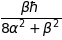

In [49]:
N=beta*hbar/(8*alpha**2+ beta**2)
N

In [50]:
A_lambda_off_diagonal=sp.zeros(3,3)
A_lambda_off_diagonal[1,2]=-N
A_lambda_off_diagonal[2,1]=N
A_lambda_off_diagonal

⎡0      0          0    ⎤
⎢                       ⎥
⎢                -β⋅h̅  ⎥
⎢0      0      ─────────⎥
⎢                 2    2⎥
⎢              8⋅α  + β ⎥
⎢                       ⎥
⎢      β⋅h̅             ⎥
⎢0  ─────────      0    ⎥
⎢      2    2           ⎥
⎣   8⋅α  + β            ⎦

### Diagonal elements of gauge potential

In [2]:
beta = sp.symbols('beta', real=True)
alpha = sp.symbols('alpha', nonnegative=True)
hbar = sp.symbols('hbar', positive=True)
H= Matrix([[beta, alpha,0], [alpha,0,alpha], [0, alpha, beta]])
P_spin1,D_spin1= H.diagonalize()

In [3]:
H

⎡β  α  0⎤
⎢       ⎥
⎢α  0  α⎥
⎢       ⎥
⎣0  α  β⎦

In [4]:
P_spin1

⎡             ___________             ___________  ⎤
⎢            ╱    2    2             ╱    2    2   ⎥
⎢      β + ╲╱  8⋅α  + β        β - ╲╱  8⋅α  + β    ⎥
⎢-1    ──────────────────      ──────────────────  ⎥
⎢             ___________             ___________  ⎥
⎢            ╱    2    2             ╱    2    2   ⎥
⎢      β   ╲╱  8⋅α  + β        β   ╲╱  8⋅α  + β    ⎥
⎢      ─ + ──────────────      ─ - ──────────────  ⎥
⎢      2         2             2         2         ⎥
⎢                                                  ⎥
⎢     ⎛       ___________⎞    ⎛       ___________⎞ ⎥
⎢     ⎜      ╱    2    2 ⎟    ⎜      ╱    2    2 ⎟ ⎥
⎢    -⎝β + ╲╱  8⋅α  + β  ⎠   -⎝β - ╲╱  8⋅α  + β  ⎠ ⎥
⎢0   ──────────────────────  ──────────────────────⎥
⎢              α                       α           ⎥
⎢                                                  ⎥
⎣1             2                       2           ⎦

In [5]:
P_simp=sp.zeros(3,3)
P_simp[:,:]=sp.simplify(P_spin1)

In [6]:
P_simp

⎡-1            2                      2         ⎤
⎢                                               ⎥
⎢     ⎛       ___________⎞           ___________⎥
⎢     ⎜      ╱    2    2 ⎟          ╱    2    2 ⎥
⎢    -⎝β + ╲╱  8⋅α  + β  ⎠   -β + ╲╱  8⋅α  + β  ⎥
⎢0   ──────────────────────  ───────────────────⎥
⎢              α                      α         ⎥
⎢                                               ⎥
⎣1             2                      2         ⎦

In [7]:
P_normalized_spin1=sp.zeros(3,3)
P_normalized_spin1[0:3,0]=Matrix.normalized(P_simp[0:3,0])
P_normalized_spin1[0:3,1]=Matrix.normalized(P_simp[0:3,1])
P_normalized_spin1[0:3,2]=Matrix.normalized(P_simp[0:3,2])

In [8]:
evector=sp.simplify(P_normalized_spin1)
evector

⎡-√2                   2⋅α                                  2⋅α               
⎢────  ───────────────────────────────────  ──────────────────────────────────
⎢ 2         ______________________________       _____________________________
⎢          ╱                            2       ╱                            2
⎢         ╱         ⎛       ___________⎞       ╱         ⎛       ___________⎞ 
⎢        ╱      2   ⎜      ╱    2    2 ⎟      ╱      2   ⎜      ╱    2    2 ⎟ 
⎢      ╲╱    8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠    ╲╱    8⋅α  + ⎝β - ╲╱  8⋅α  + β  ⎠ 
⎢                                                                             
⎢              ⎛       ___________⎞                         ___________       
⎢              ⎜      ╱    2    2 ⎟                        ╱    2    2        
⎢             -⎝β + ╲╱  8⋅α  + β  ⎠                 -β + ╲╱  8⋅α  + β         
⎢ 0    ───────────────────────────────────  ──────────────────────────────────
⎢           ______________________________       ___

In [9]:
P_diff_spin1=sp.simplify(sp.diff(evector, alpha))

In [11]:
A_lambda_diagonal=sp.zeros(3,3)
temp_var=evector.T*P_diff_spin1
A_lambda_diagonal[0,0]=temp_var[0,0]
A_lambda_diagonal[1,1]=temp_var[1,1]
A_lambda_diagonal[2,2]=temp_var[2,2]

In [10]:
P_diff_spin1

⎡     ⎛                                               ⎛                       
⎢     ⎜       ⎛         ___________⎞      ___________ ⎜       ⎛       ________
⎢     ⎜     2 ⎜        ╱    2    2 ⎟     ╱    2    2  ⎜   2   ⎜      ╱    2   
⎢   2⋅⎝- 8⋅α ⋅⎝β + 2⋅╲╱  8⋅α  + β  ⎠ + ╲╱  8⋅α  + β  ⋅⎝8⋅α  + ⎝β + ╲╱  8⋅α  + 
⎢0  ──────────────────────────────────────────────────────────────────────────
⎢                                                                 3/2         
⎢                                   ⎛                           2⎞            
⎢                       ___________ ⎜       ⎛       ___________⎞ ⎟            
⎢                      ╱    2    2  ⎜   2   ⎜      ╱    2    2 ⎟ ⎟            
⎢                    ╲╱  8⋅α  + β  ⋅⎝8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠ ⎠            
⎢                                                                             
⎢                                       2⋅√2⋅α⋅β                              
⎢0                   ───────────────────────────────

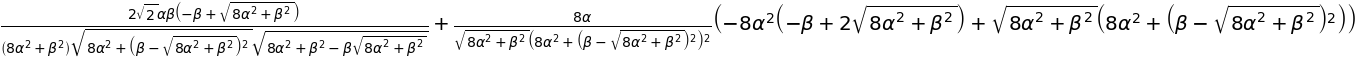

In [16]:
A_lambda_diagonal[2,2]

In [52]:
A_lambda_off_diagonal

⎡0      0          0    ⎤
⎢                       ⎥
⎢                -β⋅h̅  ⎥
⎢0      0      ─────────⎥
⎢                 2    2⎥
⎢              8⋅α  + β ⎥
⎢                       ⎥
⎢      β⋅h̅             ⎥
⎢0  ─────────      0    ⎥
⎢      2    2           ⎥
⎣   8⋅α  + β            ⎦

In [121]:
A_lambda_final=A_lambda_off_diagonal + sp.simplify(A_lambda_diagonal)*hbar/sp.sqrt(2)
A_lambda_final

⎡0            0                      0          ⎤
⎢                                               ⎥
⎢              2                                ⎥
⎢          √2⋅β ⋅h̅               -2⋅β⋅h̅       ⎥
⎢0  ─────────────────────        ─────────      ⎥
⎢       4       2  2    4           2    2      ⎥
⎢   64⋅α  + 16⋅α ⋅β  + β         8⋅α  + β       ⎥
⎢                                               ⎥
⎢                                     2         ⎥
⎢           2⋅β⋅h̅                √2⋅β ⋅h̅      ⎥
⎢0        ─────────        ─────────────────────⎥
⎢            2    2            4       2  2    4⎥
⎣         8⋅α  + β         64⋅α  + 16⋅α ⋅β  + β ⎦

### Verification of gauge potential
$[H, \partial_{\lambda} H] - \dfrac{i}{\hbar} [H,[H,A_{\lambda}] ]=0$

In [31]:
def commutator(a,b):
    return a*b-b*a

In [32]:
alpha,beta = sp.symbols('alpha beta', real=True)
hbar = sp.symbols('hbar', positive=True)
H= Matrix([[beta, alpha,0], [alpha,0,alpha], [0, alpha, beta]])

In [33]:
S_plus= hbar*sp.sqrt(2)*Matrix([[0,1,0],[0,0,1], [0,0,0] ])
S_minus= hbar*sp.sqrt(2)*Matrix([[0,0,0],[1,0,0], [0,1,0] ])
partial_lambda_H =(S_plus+ S_minus)/2

In [34]:
H, partial_lambda_H

⎛           ⎡       √2⋅h̅       ⎤⎞
⎜⎡β  α  0⎤, ⎢  0    ─────    0  ⎥⎟
⎜⎢       ⎥  ⎢         2         ⎥⎟
⎜⎢α  0  α⎥  ⎢                   ⎥⎟
⎜⎢       ⎥  ⎢√2⋅h̅         √2⋅h̅⎥⎟
⎜⎣0  α  β⎦  ⎢─────    0    ─────⎥⎟
⎜           ⎢  2             2  ⎥⎟
⎜           ⎢                   ⎥⎟
⎜           ⎢       √2⋅h̅       ⎥⎟
⎜           ⎢  0    ─────    0  ⎥⎟
⎝           ⎣         2         ⎦⎠

In [35]:
P,D= H.diagonalize()

In [42]:
P,D

⎛⎡             ___________             ___________  ⎤                         
⎜⎢            ╱    2    2             ╱    2    2   ⎥                         
⎜⎢      β + ╲╱  8⋅α  + β        β - ╲╱  8⋅α  + β    ⎥                         
⎜⎢-1    ──────────────────      ──────────────────  ⎥, ⎡β          0          
⎜⎢             ___________             ___________  ⎥  ⎢                      
⎜⎢            ╱    2    2             ╱    2    2   ⎥  ⎢          ___________ 
⎜⎢      β   ╲╱  8⋅α  + β        β   ╲╱  8⋅α  + β    ⎥  ⎢         ╱    2    2  
⎜⎢      ─ + ──────────────      ─ - ──────────────  ⎥  ⎢   β   ╲╱  8⋅α  + β   
⎜⎢      2         2             2         2         ⎥  ⎢0  ─ - ────────────── 
⎜⎢                                                  ⎥  ⎢   2         2        
⎜⎢     ⎛       ___________⎞    ⎛       ___________⎞ ⎥  ⎢                      
⎜⎢     ⎜      ╱    2    2 ⎟    ⎜      ╱    2    2 ⎟ ⎥  ⎢                      
⎜⎢    -⎝β + ╲╱  8⋅α  + β  ⎠   -⎝β - ╲╱  8⋅α  + β  ⎠ 

In [37]:
sp.simplify(P.T*(H*P))

⎡2⋅β          0                 0        ⎤
⎢                                        ⎥
⎢           ___________                  ⎥
⎢          ╱    2    2                   ⎥
⎢ 0   -8⋅╲╱  8⋅α  + β           0        ⎥
⎢                                        ⎥
⎢                             ___________⎥
⎢                            ╱    2    2 ⎥
⎣ 0           0          8⋅╲╱  8⋅α  + β  ⎦

In [39]:
P_normalized_spin1=sp.zeros(3,3)
P_normalized_spin1[0:3,0]=Matrix.normalized(P[0:3,0])
P_normalized_spin1[0:3,1]=Matrix.normalized(P[0:3,1])
P_normalized_spin1[0:3,2]=Matrix.normalized(P[0:3,2])

In [45]:
H_d=sp.simplify(P_normalized_spin1.T*(H*P_normalized_spin1))
H_d#ham diagonalize

⎡β               0                             0              ⎤
⎢                                                             ⎥
⎢               ___________                                   ⎥
⎢          2   ╱    2    2                                    ⎥
⎢      -8⋅α ⋅╲╱  8⋅α  + β                                     ⎥
⎢0  ────────────────────────────               0              ⎥
⎢                              2                              ⎥
⎢          ⎛       ___________⎞                               ⎥
⎢      2   ⎜      ╱    2    2 ⎟                               ⎥
⎢   8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠                               ⎥
⎢                                                             ⎥
⎢                                             ___________     ⎥
⎢                                        2   ╱    2    2      ⎥
⎢                                     8⋅α ⋅╲╱  8⋅α  + β       ⎥
⎢0               0                ────────────────────────────⎥
⎢                                       

In [46]:
partial_lambda_H_d=sp.simplify(P_normalized_spin1.T*(partial_lambda_H*P_normalized_spin1))
partial_lambda_H_d

⎡0                                     0                                      
⎢                                                                             
⎢                                 ⎛       ___________⎞                        
⎢                                 ⎜      ╱    2    2 ⎟                        
⎢                      -4⋅√2⋅α⋅h̅⋅⎝β + ╲╱  8⋅α  + β  ⎠                        
⎢0                     ────────────────────────────────                      ─
⎢                                                   2                         
⎢                               ⎛       ___________⎞                          
⎢                           2   ⎜      ╱    2    2 ⎟                          
⎢                        8⋅α  + ⎝β + ╲╱  8⋅α  + β  ⎠                          
⎢                                                                            ╲
⎢                                                                             
⎢                                                   

In [48]:
sp.simplify(commutator(H_d,partial_lambda_H_d))

⎡0                                    0                                       
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢0                                    0                                    ───
⎢                                                                             
⎢                                                                             
⎢                                                                            ╱
⎢                                                                          ╲╱ 
⎢                                                                             
⎢                                     ______________                          
⎢                                    ╱     2      2 

In [56]:
A_lambda_off_diagonal

⎡0      0          0    ⎤
⎢                       ⎥
⎢                -β⋅h̅  ⎥
⎢0      0      ─────────⎥
⎢                 2    2⎥
⎢              8⋅α  + β ⎥
⎢                       ⎥
⎢      β⋅h̅             ⎥
⎢0  ─────────      0    ⎥
⎢      2    2           ⎥
⎣   8⋅α  + β            ⎦

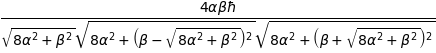

In [62]:
A_lambda_off_diagonal_S_zbasis=sp.simplify(P_normalized_spin1*(A_lambda_off_diagonal*P_normalized_spin1.T))
A_lambda_off_diagonal_S_zbasis[1,0]

In [61]:
A_lambda_off_diagonal_S_zbasis/A_lambda_off_diagonal_S_zbasis[1,0]

⎡0  -1  0⎤
⎢        ⎥
⎢1  0   1⎥
⎢        ⎥
⎣0  -1  0⎦

In [59]:
sp.simplify(P_normalized_spin1*(H_d*P_normalized_spin1.T))

⎡β  α  0⎤
⎢       ⎥
⎢α  0  α⎥
⎢       ⎥
⎣0  α  β⎦

In [54]:
c1=commutator(H_d,A_lambda_off_diagonal)
sp.simplify(c1)

⎡0        0               0       ⎤
⎢                                 ⎥
⎢                        β⋅h̅     ⎥
⎢0        0         ──────────────⎥
⎢                      ___________⎥
⎢                     ╱    2    2 ⎥
⎢                   ╲╱  8⋅α  + β  ⎥
⎢                                 ⎥
⎢        β⋅h̅                     ⎥
⎢0  ──────────────        0       ⎥
⎢      ___________                ⎥
⎢     ╱    2    2                 ⎥
⎣   ╲╱  8⋅α  + β                  ⎦

In [55]:
sp.simplify(commutator(H_d,c1))

⎡0   0      0  ⎤
⎢              ⎥
⎢0   0    -β⋅h̅⎥
⎢              ⎥
⎣0  β⋅h̅    0  ⎦

In [63]:
sp.simplify(commutator(H,partial_lambda_H))

⎡           √2⋅β⋅h̅           ⎤
⎢    0      ───────      0    ⎥
⎢              2              ⎥
⎢                             ⎥
⎢-√2⋅β⋅h̅            -√2⋅β⋅h̅ ⎥
⎢─────────     0     ─────────⎥
⎢    2                   2    ⎥
⎢                             ⎥
⎢           √2⋅β⋅h̅           ⎥
⎢    0      ───────      0    ⎥
⎣              2              ⎦

In [64]:
c1=commutator(H,A_lambda_off_diagonal_S_zbasis)
sp.simplify(c1)

⎡                                         2                                   
⎢                                      8⋅α ⋅β⋅h̅                              
⎢─────────────────────────────────────────────────────────────────────────────
⎢                    ______________________________      _____________________
⎢                   ╱                            2      ╱                     
⎢   ___________    ╱         ⎛       ___________⎞      ╱         ⎛       _____
⎢  ╱    2    2    ╱      2   ⎜      ╱    2    2 ⎟     ╱      2   ⎜      ╱    2
⎢╲╱  8⋅α  + β  ⋅╲╱    8⋅α  + ⎝β - ╲╱  8⋅α  + β  ⎠  ⋅╲╱    8⋅α  + ⎝β + ╲╱  8⋅α 
⎢                                                                             
⎢                                           2                                 
⎢                                     -4⋅α⋅β ⋅h̅                              
⎢─────────────────────────────────────────────────────────────────────────────
⎢                    ______________________________ 

In [65]:
c2=commutator(H,c1)

In [66]:
sp.simplify(c2)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                   0                                     ────
⎢                                                                             
⎢                                                                            ╱
⎢                                                                           ╱ 
⎢                                                                         ╲╱  
⎢                                                                             
⎢                                    ___________                              
⎢                                   ╱    2    2                               
⎢                        4⋅α⋅β⋅h̅⋅╲╱  8⋅α  + β                                
⎢───────────────────────────────────────────────────

### Solving some eigenvalue equation

In [12]:
hbar, Delta = sp.symbols('hbar Delta', positive=True)
lamba = sp.symbols('lambda', real=True)
S_plus=sp.sqrt(2)*Matrix([[0,1,0],[0,0,1], [0,0,0] ])
S_minus=sp.sqrt(2)*Matrix([[0,0,0],[1,0,0], [0,1,0] ])
S_x=(S_plus+ S_minus)/2

In [18]:
epsilon, eta = sp.symbols('epsilon, eta', positive=True)


In [13]:
vec= Matrix([[1], [0], [-1]])
S_x, vec

⎛⎡    √2    ⎤      ⎞
⎜⎢0   ──  0 ⎥, ⎡1 ⎤⎟
⎜⎢    2     ⎥  ⎢  ⎥⎟
⎜⎢          ⎥  ⎢0 ⎥⎟
⎜⎢√2      √2⎥  ⎢  ⎥⎟
⎜⎢──  0   ──⎥  ⎣-1⎦⎟
⎜⎢2       2 ⎥      ⎟
⎜⎢          ⎥      ⎟
⎜⎢    √2    ⎥      ⎟
⎜⎢0   ──  0 ⎥      ⎟
⎝⎣    2     ⎦      ⎠

In [7]:
S_x*vec

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [14]:
S_z=Matrix([[1,0,0],[0,0,0], [0,0,-1] ])

In [9]:
S_z**2*vec

⎡  2 ⎤
⎢h̅  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢   2⎥
⎣-h̅ ⎦

In [26]:
Ham= hbar*Delta*S_z**2+ hbar*(Delta/2)*S_z+ hbar*lamba*S_x

In [27]:
Ham

⎡3⋅Δ⋅h̅   √2⋅h̅⋅λ         ⎤
⎢──────   ───────     0   ⎥
⎢  2         2            ⎥
⎢                         ⎥
⎢√2⋅h̅⋅λ           √2⋅h̅⋅λ⎥
⎢───────     0     ───────⎥
⎢   2                 2   ⎥
⎢                         ⎥
⎢         √2⋅h̅⋅λ   Δ⋅h̅  ⎥
⎢   0     ───────   ────  ⎥
⎣            2       2    ⎦

In [28]:
P,D= Ham.diagonalize()

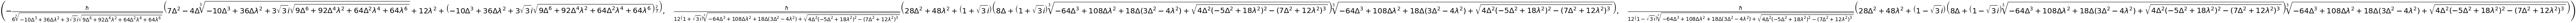

In [29]:
sp.simplify(D[0,0]), sp.simplify(D[1,1]), sp.simplify(D[2,2])